___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [2]:
!python --version

Python 3.9.13


In [1]:
pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.7 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 11.7 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 12.4 MB/s eta 0:00:00
     --------------------------------------

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


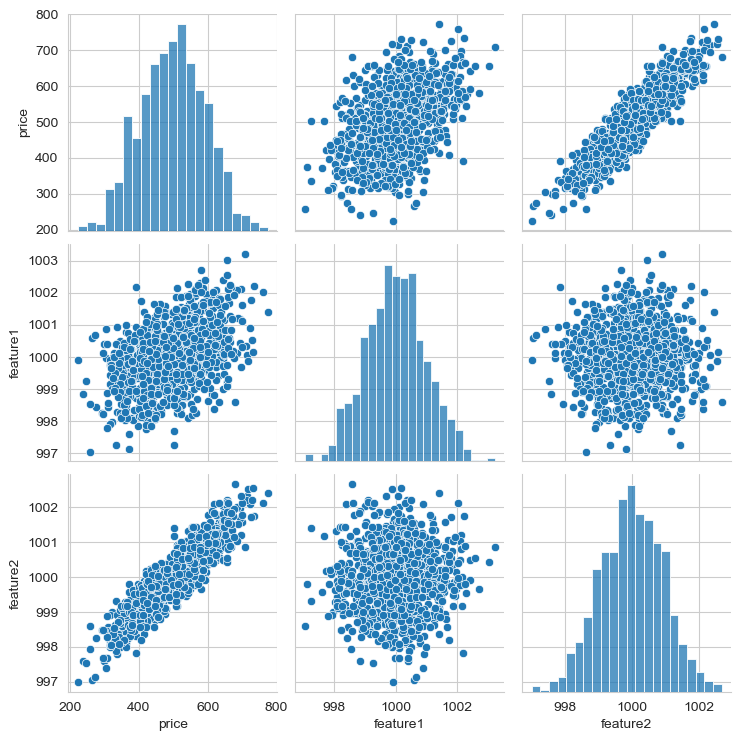

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [12]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [13]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [14]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [90]:
# help(Sequential)

In [91]:
# help(Dense)

In [24]:
X_train.shape

(700, 2)

In [70]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [71]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 12        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.weights

[<tf.Variable 'dense_16/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.76903224,  0.22884011,  0.35749888, -0.7134614 ],
        [ 0.6001029 ,  0.90251946,  0.5668242 ,  0.89636683]],
       dtype=float32)>,
 <tf.Variable 'dense_16/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_17/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.44581693, -0.2158196 , -0.24609405, -0.01331568],
        [ 0.33196348, -0.16127223, -0.05641598, -0.79263103],
        [ 0.5031292 , -0.5231393 , -0.1582694 ,  0.10952014],
        [ 0.4901293 ,  0.6614596 ,  0.5760539 ,  0.01822466]],
       dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_18/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.17565805,  0.08309543,  0.75319237, -0.63845664],
        [ 0.46175903,  0.13851827, -0.20468599, -0.5866697 ],
        [-0.26650155, -0.01610458, -0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [74]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [75]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256584.2812
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256445.4688
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256295.0781
Epoch 4/250
22/22 [==============================] - 0s 995us/step - loss: 256122.4219
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255925.8438
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255703.7969
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255450.0156
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255158.4688
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254821.9844
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254437.9375
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254009.0312
Epoch 12/250
22/22 [==============================] - 0s 1ms/

22/22 [==============================] - 0s 1ms/step - loss: 733.3309
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 710.3971
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 686.4318
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 669.3227
Epoch 100/250
22/22 [==============================] - 0s 983us/step - loss: 647.9100
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 628.9238
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 606.7577
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 584.5706
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 563.5561
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 539.7918
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 520.5496
Epoch 107/250
22/22 [==============================] - 0s 958us/step - loss: 499.7849
Epoch

22/22 [==============================] - 0s 1ms/step - loss: 24.3504
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 24.4689
Epoch 195/250
22/22 [==============================] - 0s 957us/step - loss: 24.1030
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2157
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 24.7438
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2542
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2431
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4217
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 23.9302
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.4764
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3510
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2604
Epoch 205/250
22

In [76]:
model.weights

[<tf.Variable 'dense_16/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[1.650101  , 1.9208202 , 2.045676  , 0.97914827],
        [2.4558575 , 3.5665522 , 3.2269108 , 3.5600278 ]], dtype=float32)>,
 <tf.Variable 'dense_16/bias:0' shape=(4,) dtype=float32, numpy=array([0.01927744, 0.8274828 , 0.823791  , 0.8277262 ], dtype=float32)>,
 <tf.Variable 'dense_17/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 1.5689007 ,  1.7435348 , -0.32617277, -0.01331568],
        [ 2.2199576 ,  1.6623809 , -0.16094102, -0.79263103],
        [ 2.3404179 ,  1.2501062 , -0.26329207,  0.10952014],
        [ 2.409229  ,  2.5094023 ,  0.4708448 ,  0.01822466]],
       dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.8086145 ,  0.74794066, -0.10353167,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_18/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.28823578,  1.9333724 ,  2.609494  , -0.63845664],
        [ 0.3489337 ,  1.9289143 ,  1.5900624 

In [77]:
model.history.history

{'loss': [256584.28125,
  256445.46875,
  256295.078125,
  256122.421875,
  255925.84375,
  255703.796875,
  255450.015625,
  255158.46875,
  254821.984375,
  254437.9375,
  254009.03125,
  253527.359375,
  252992.875,
  252406.171875,
  251760.3125,
  251048.15625,
  250268.640625,
  249421.515625,
  248494.1875,
  247484.109375,
  246389.46875,
  245197.328125,
  243895.21875,
  242481.6875,
  240959.25,
  239313.484375,
  237542.234375,
  235645.984375,
  233598.125,
  231417.296875,
  229100.703125,
  226610.71875,
  223961.234375,
  221164.234375,
  218202.3125,
  215070.953125,
  211742.484375,
  208270.015625,
  204605.734375,
  200756.3125,
  196739.34375,
  192498.359375,
  188081.171875,
  183482.09375,
  178706.515625,
  173745.515625,
  168585.578125,
  163261.3125,
  157776.0625,
  152079.34375,
  146233.390625,
  140232.875,
  134119.140625,
  127846.3671875,
  121460.03125,
  114940.59375,
  108354.7578125,
  101682.9921875,
  94966.3125,
  88185.953125,
  81472.8203125,

In [78]:
pd.DataFrame(model.history.history)

,loss
0,256584.281
1,256445.469
2,256295.078
3,256122.422
4,255925.844
...,...
245,24.185
246,24.621
247,24.097
248,24.592


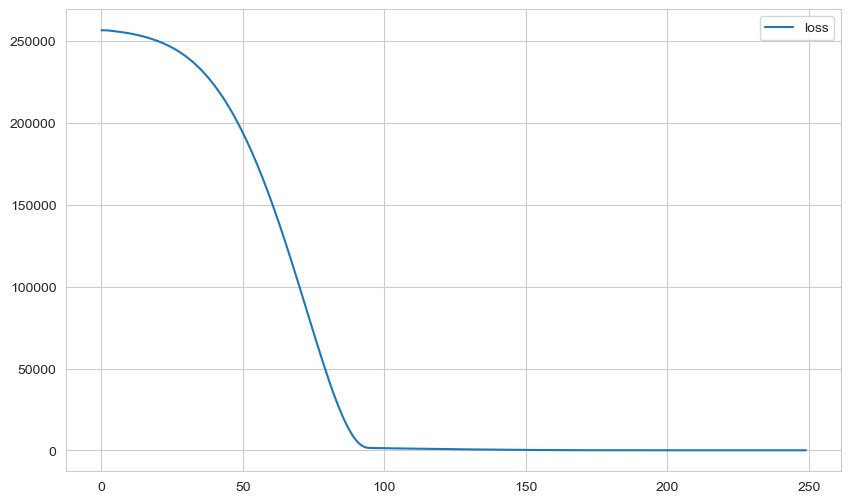

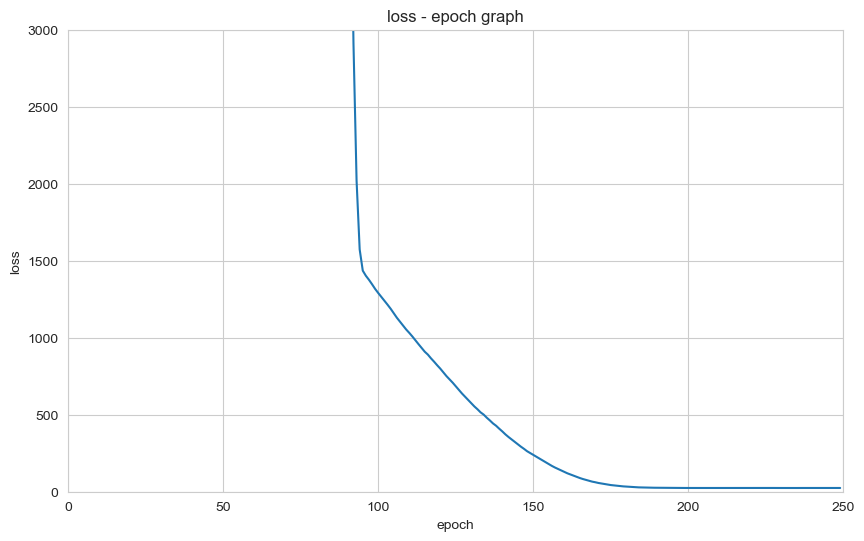

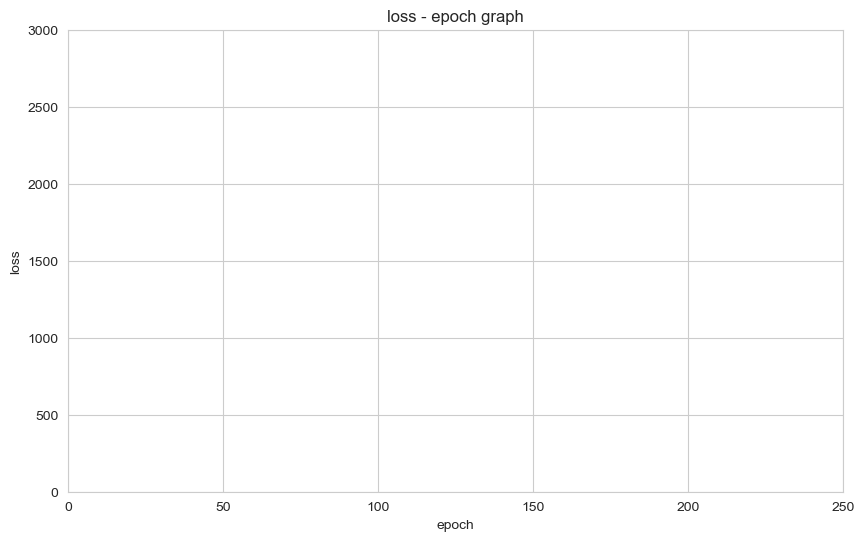

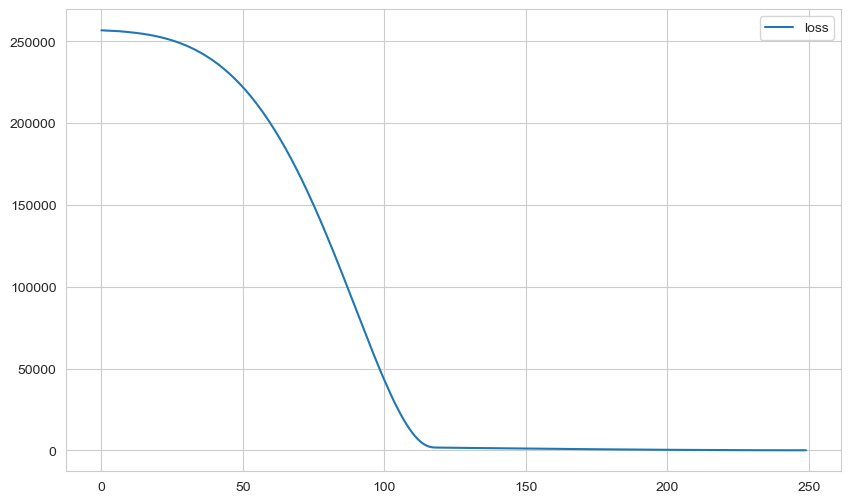

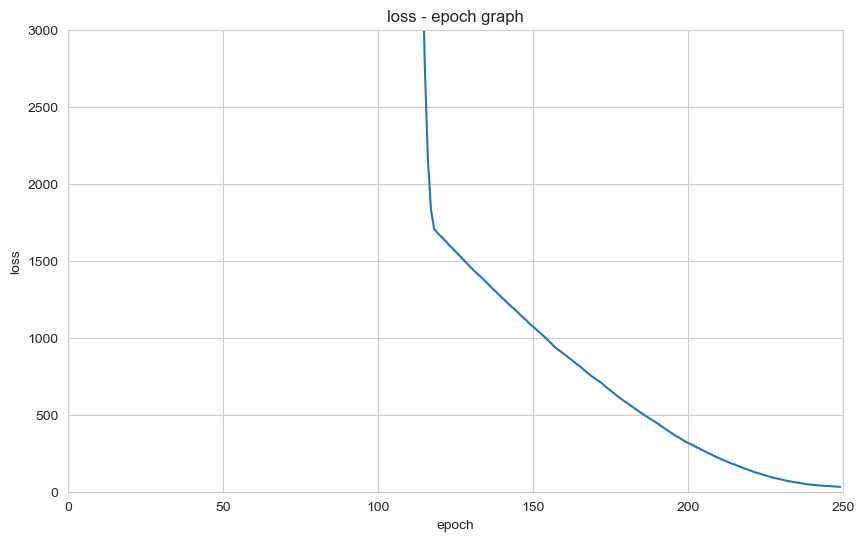

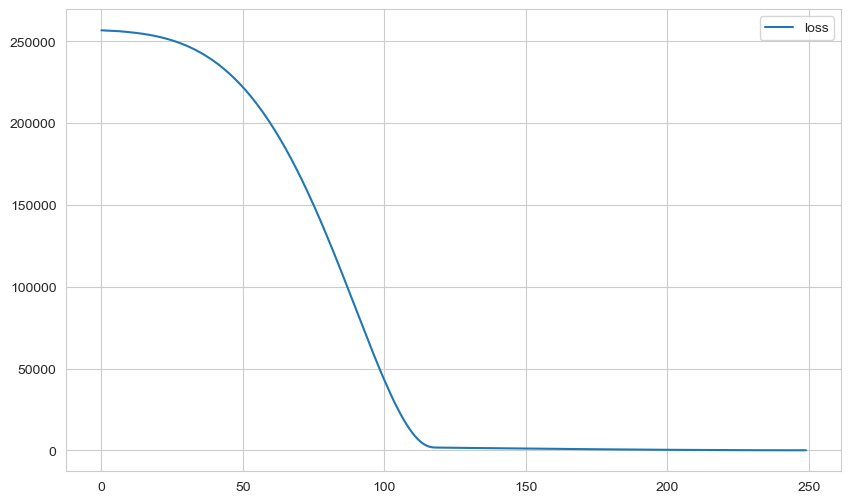

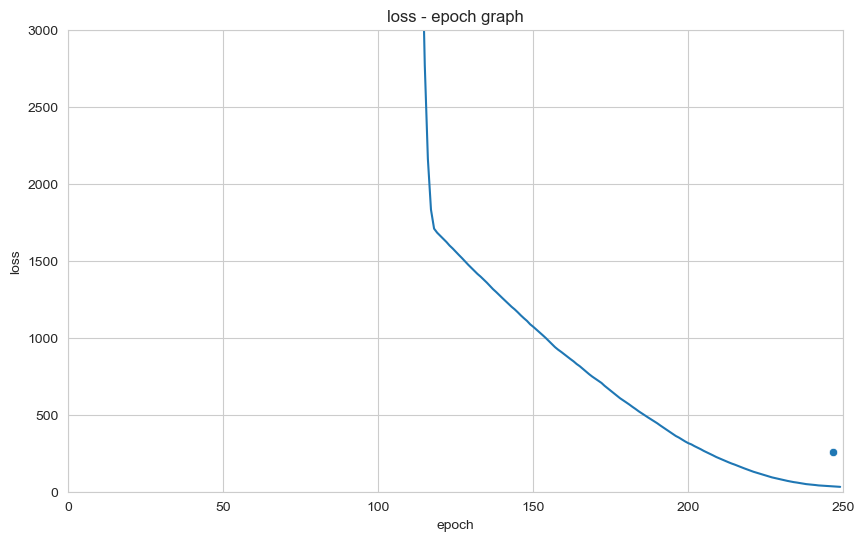

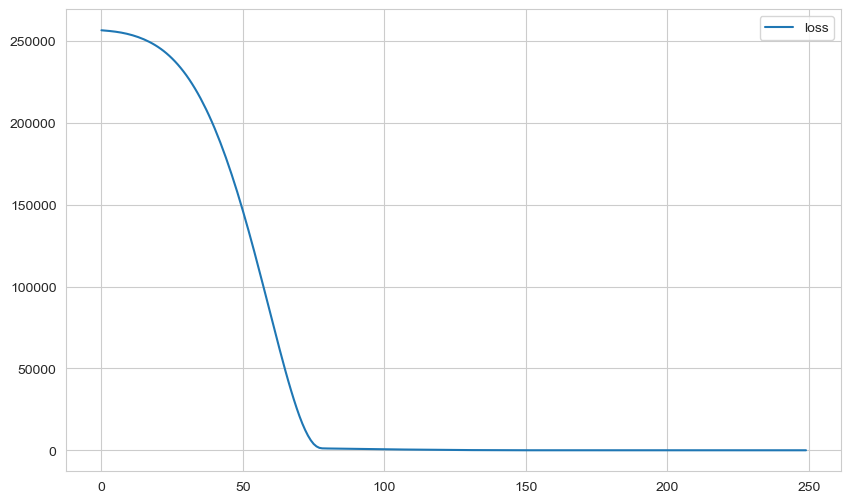

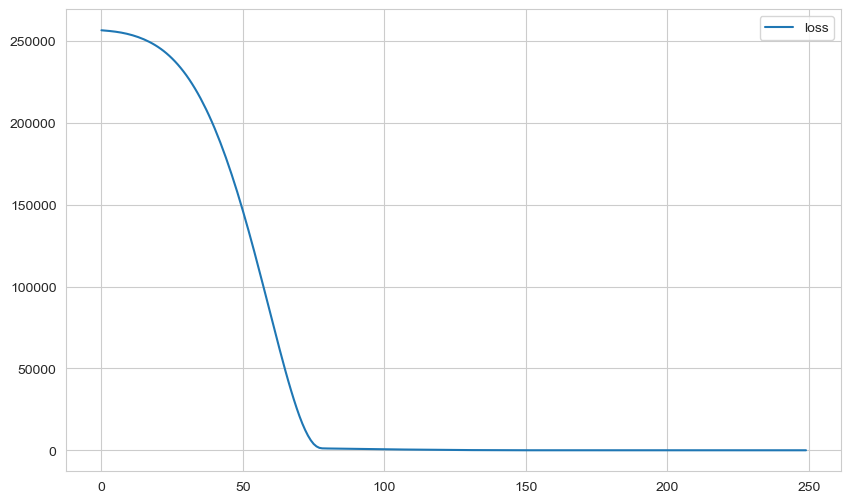

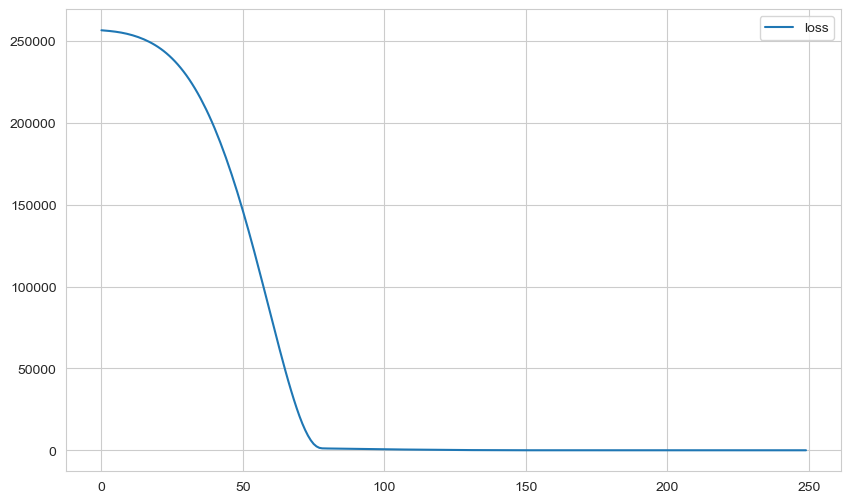

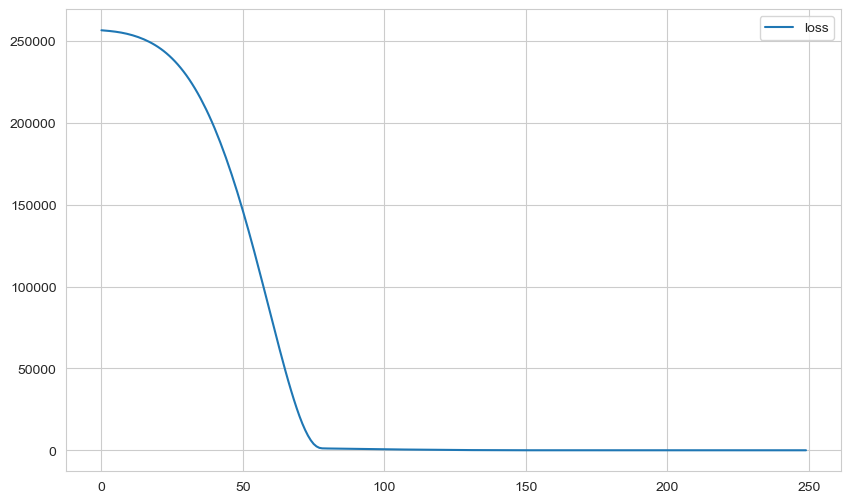

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

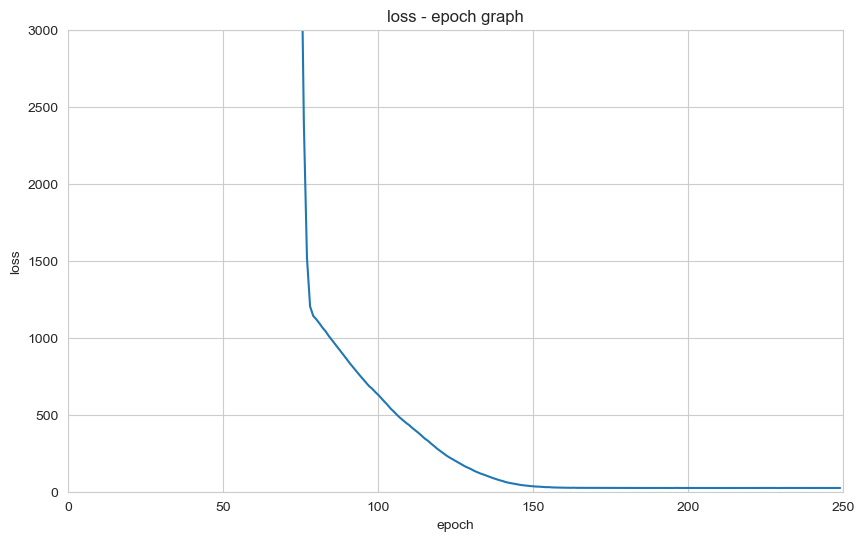

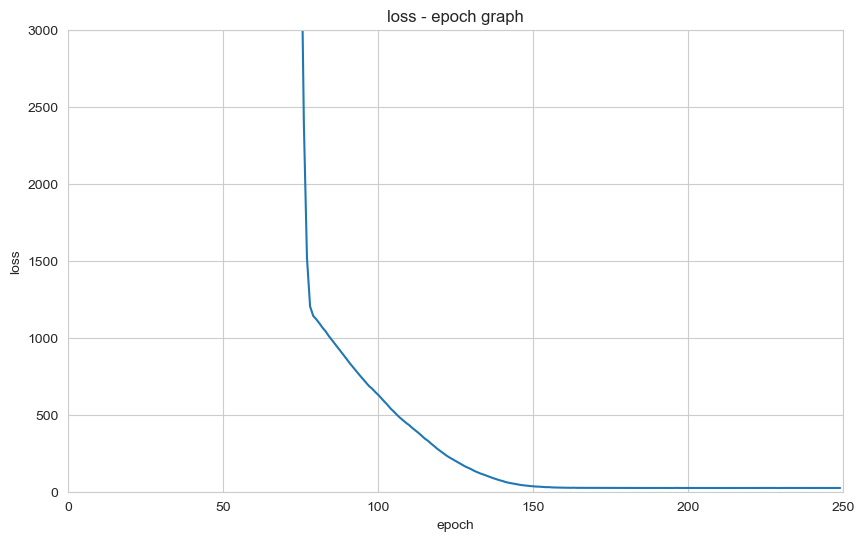

In [84]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values
plt.show()

## Model Performance

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
model.evaluate(X_train, y_train, verbose=0)

24.78687286376953

In [87]:
model.evaluate(X_test, y_test, verbose=0)

27.128398895263672

In [88]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 981us/step


(300, 1)

In [89]:
y_test.shape

(300,)

In [90]:
y_pred.reshape(-1,).shape

(300,)

In [91]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
761,674.311,664.372
542,689.173,684.659
218,438.265,436.405
298,511.367,513.748
595,604.573,606.237
60,355.795,347.034
429,526.448,530.271
994,481.863,480.813
613,497.465,494.012
76,547.732,550.464


In [92]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

In [93]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [94]:
eval_metric(y_test, y_pred)

r2_score: 0.9969144335493327 
mae: 4.224994250606731 
mse: 27.12839794000149 
rmse: 5.208492866463531


## Final Model and Model Deployment

### Final Model Training

In [95]:
scaler = MinMaxScaler().fit(X)

In [96]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [97]:
X_scaled = scaler.transform(X)

In [98]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257262.1094
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 256978.0156
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 256613.5469
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256150.3750
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 255501.2188
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 254581.9688
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 253439.8438
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 252042.7031
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 250436.2812
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 248544.3594
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 246319.2656
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

32/32 [==============================] - 0s 999us/step - loss: 30.6253
Epoch 98/250
32/32 [==============================] - 0s 905us/step - loss: 29.2521
Epoch 99/250
32/32 [==============================] - 0s 918us/step - loss: 28.3200
Epoch 100/250
32/32 [==============================] - 0s 995us/step - loss: 27.4549
Epoch 101/250
32/32 [==============================] - 0s 957us/step - loss: 26.7245
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 26.4410
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 25.8338
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 25.6038
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 25.3651
Epoch 106/250
32/32 [==============================] - 0s 998us/step - loss: 25.3318
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 25.2179
Epoch 108/250
32/32 [==============================] - 0s 904us/step - loss: 24.9883
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 24.8492
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.9246
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7044
Epoch 198/250
32/32 [==============================] - 0s 878us/step - loss: 25.1352
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 25.5602
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5475
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 25.0272
Epoch 202/250
32/32 [==============================] - 0s 991us/step - loss: 24.8701
Epoch 203/250
32/32 [==============================] - 0s 913us/step - loss: 25.1089
Epoch 204/250
32/32 [==============================] - 0s 968us/step - loss: 24.8315
Epoch 205/250
32/32 [==============================] - 0s 998us/step - loss: 25.2624
Epoch 206/250
32/32 [==============================] - 0s 939us/step - loss: 24.8390
Epoch 

In [99]:
final_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 12        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [100]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [101]:
#final_model.save("model_fake_reg") 

### Loading Model

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model_fake_reg = load_model('model_fake_reg.h5')

In [104]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [105]:
sample = [[998, 1000]]

In [106]:
sample_scaled = scaler_fake_reg.transform(sample)

In [107]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 51ms/step


array([[420.0017]], dtype=float32)

## Prediction-2

In [76]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [77]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [78]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [79]:
model_fake_reg.predict(sample_scaled)

array([[380.26678],
       [331.80624],
       [283.34576],
       [234.88527],
       [186.35524]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___